In [1]:
# LIBRARIES

import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({
	"text.usetex": False,
})

numpy: 1.21.5
matplotlib: 3.5.1


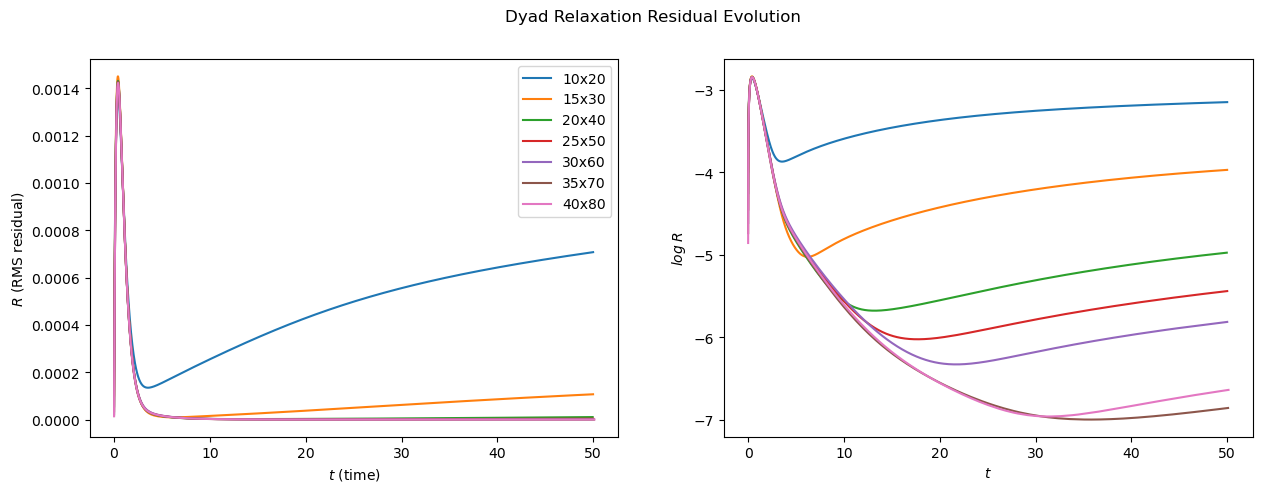

In [3]:
# DYAD RELAXATION RESIDUAL

fig, (ax1, ax2) = plt.subplots(1,2)

entries = [
	[np.genfromtxt('residuals_ellipsoid_10x20.csv', delimiter=','), '10x20', 2.25e-02],
	[np.genfromtxt('residuals_ellipsoid_15x30.csv', delimiter=','), '15x30', 1.00e-02],
	[np.genfromtxt('residuals_ellipsoid_20x40.csv', delimiter=','), '20x40', 5.62e-03],
	[np.genfromtxt('residuals_ellipsoid_25x50.csv', delimiter=','), '25x50', 3.60e-03],
	[np.genfromtxt('residuals_ellipsoid_30x60.csv', delimiter=','), '30x60', 2.50e-03],
	[np.genfromtxt('residuals_ellipsoid_35x70.csv', delimiter=','), '35x70', 1.84e-03],
	[np.genfromtxt('residuals_ellipsoid_40x80.csv', delimiter=','), '40x80', 1.41e-03],
]


for entry in entries:
	i_values = np.array(entry[0][:,0])
	residuals = np.array(entry[0][:,1])
	log_residuals = np.log(residuals) / np.log(10)

	label = entry[1]

	time_step = entry[2]
	times = np.array(i_values) * time_step

	ax1.plot(times, residuals, label = label)
	ax1.set(xlabel='$t$ (time)', ylabel='$R$ (RMS residual)')

	ax2.plot(times, log_residuals, label = label)
	ax2.set(xlabel='$t$', ylabel='$log \; R$')

fig.suptitle('Dyad Relaxation Residual Evolution')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.legend()
plt.show()

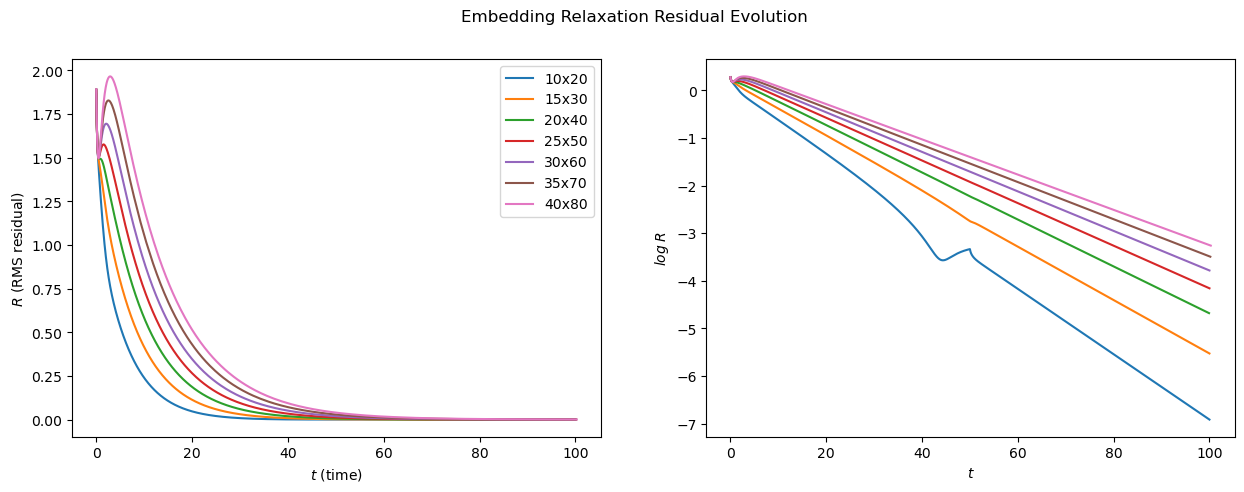

In [4]:
# EMBEDDING RELAXATION RESIDUAL

fig, (ax1, ax2) = plt.subplots(1,2)

entries = [
	[np.genfromtxt('embedding_residuals_ellipsoid_10x20.csv', delimiter=','), '10x20', 2.25e-02],
	[np.genfromtxt('embedding_residuals_ellipsoid_15x30.csv', delimiter=','), '15x30', 1.00e-02],
	[np.genfromtxt('embedding_residuals_ellipsoid_20x40.csv', delimiter=','), '20x40', 5.62e-03],
	[np.genfromtxt('embedding_residuals_ellipsoid_25x50.csv', delimiter=','), '25x50', 3.60e-03],
	[np.genfromtxt('embedding_residuals_ellipsoid_30x60.csv', delimiter=','), '30x60', 2.50e-03],
	[np.genfromtxt('embedding_residuals_ellipsoid_35x70.csv', delimiter=','), '35x70', 1.84e-03],
	[np.genfromtxt('embedding_residuals_ellipsoid_40x80.csv', delimiter=','), '40x80', 1.41e-03],
]


for entry in entries:
	i_values = np.array(entry[0][:,0])
	residuals = np.array(entry[0][:,1])
	log_residuals = np.log(residuals) / np.log(10)

	label = entry[1]

	time_step = entry[2]
	times = np.array(i_values) * time_step

	ax1.plot(times, residuals, label = label)
	ax1.set(xlabel='$t$ (time)', ylabel='$R$ (RMS residual)')

	ax2.plot(times, log_residuals, label = label)
	ax2.set(xlabel='$t$', ylabel='$log \; R$')

fig.suptitle('Embedding Relaxation Residual Evolution')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.legend()
plt.show()

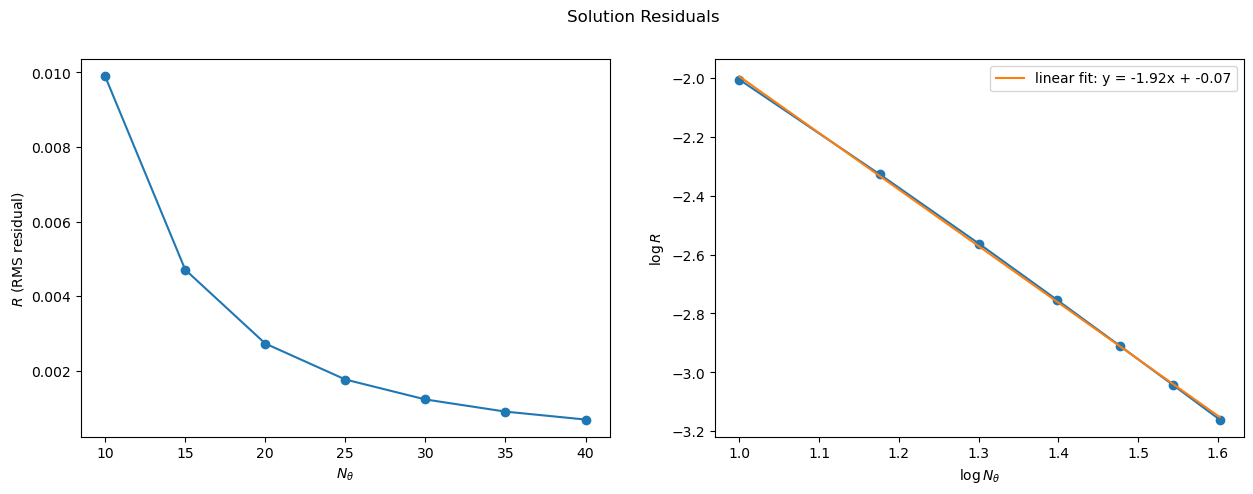

In [2]:
# SOLUTION RESIDUALS (CONVERGENCE TEST)

fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('solution_residuals.csv', delimiter=',')

N_values = np.array(entries[:,0])
residuals = np.array(entries[:,1])
log_N_values = np.log(N_values) / np.log(10)
log_residuals = np.log(residuals) / np.log(10)

ax1.plot(N_values, residuals, marker='o')
ax1.set(xlabel=r'$N_{\theta}$', ylabel=r'$R$ (RMS residual)')

a, b = np.polyfit(log_N_values, log_residuals, 1)
ax2.plot(log_N_values, log_residuals, marker='o')
ax2.plot(log_N_values, a*log_N_values+b, label=f'linear fit: y = {a:.2f}x + {b:.2f}')
ax2.set(xlabel=r'$\log N_\theta$', ylabel=r'$\log R$')

fig.suptitle('Solution Residuals')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax2.legend()
plt.show()

(1.0, 0.9542425094393249)
(1.1760912590556811, 1.6127838567197355)
(1.301029995663981, 2.1003705451175625)
(1.3979400086720375, 2.4668676203541096)
(1.4771212547196624, 2.7831886910752575)
(1.5440680443502754, 3.0406023401140727)
(1.6020599913279623, 3.2655253352190736)
y = 3.85 * x + -2.90


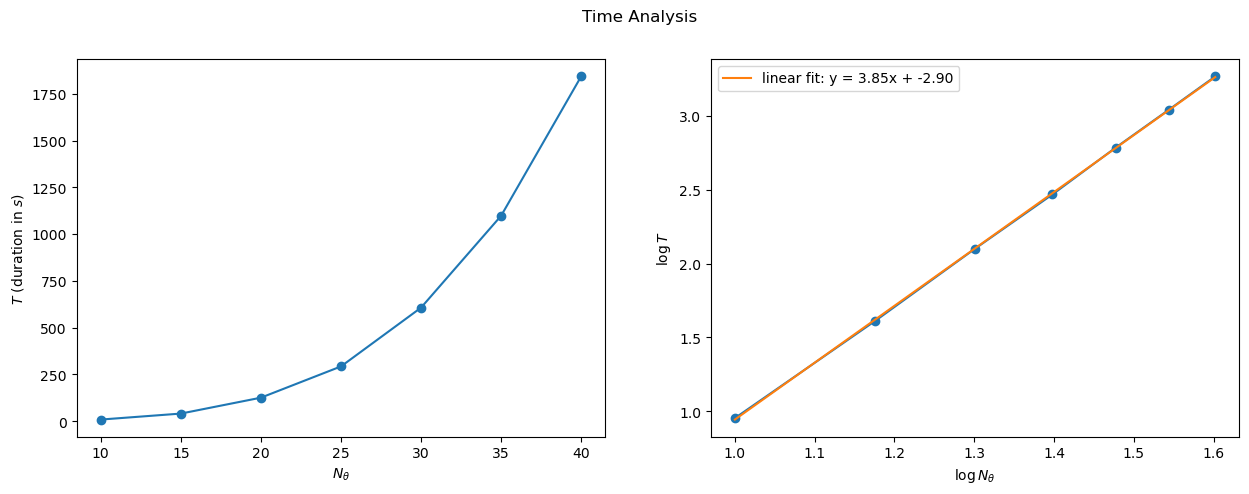

In [14]:
# TIME ANALYSIS
fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('durations.csv', delimiter=',')

N_values = np.array(entries[:,0])
durations = np.array(entries[:,1])
log_N_values = np.log(N_values) / np.log(10)
log_durations = np.log(durations) / np.log(10)

ax1.plot(N_values, durations, marker='o')
ax1.set(xlabel=r'$N_{\theta}$', ylabel=r'$T$ (duration in $s$)')

a, b = np.polyfit(log_N_values, log_durations, 1)
ax2.plot(log_N_values, log_durations, marker='o')
ax2.plot(log_N_values, a*log_N_values+b, label=f'linear fit: y = {a:.2f}x + {b:.2f}')
ax2.set(xlabel=r'$\log N_\theta$', ylabel=r'$\log T$')

fig.suptitle('Time Analysis')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax2.legend()
plt.show()